Importação de bibliotecas 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Definição das variáveis de entrada e saída

In [3]:
curso_superior = ctrl.Antecedent(np.arange(0, 101, 1), 'curso superior')
experiencia = ctrl.Antecedent(np.arange(0, 101, 1), 'experiência')
conhecimento_tecnico = ctrl.Antecedent(np.arange(0, 101, 1), 'conhecimento técnico')
habilidade_vendas = ctrl.Antecedent(np.arange(0, 101, 1), 'habilidade de vendas')
admissao = ctrl.Consequent(np.arange(0, 101, 10), 'admissão')

Fuzzificação

In [4]:
curso_superior['incompleto'] = fuzz.trapmf(curso_superior.universe, [0, 0, 30, 50])
curso_superior['cursando'] = fuzz.trimf(curso_superior.universe, [30, 50, 70])
curso_superior['completo'] = fuzz.trapmf(curso_superior.universe, [50, 70, 100, 100])

experiencia['inexperiente'] = fuzz.trapmf(experiencia.universe, [0, 0, 30, 70])
experiencia['experiente'] = fuzz.trapmf(experiencia.universe, [30, 70, 100, 100])

conhecimento_tecnico['baixo'] = fuzz.trapmf(conhecimento_tecnico.universe, [0, 0, 30, 50])
conhecimento_tecnico['médio'] = fuzz.trimf(conhecimento_tecnico.universe, [30, 50, 70])
conhecimento_tecnico['alto'] = fuzz.trapmf(conhecimento_tecnico.universe, [50, 70, 100, 100])

habilidade_vendas['baixa'] = fuzz.trapmf(habilidade_vendas.universe, [0, 0, 30, 50])
habilidade_vendas['média'] = fuzz.trimf(habilidade_vendas.universe, [30, 50, 70])
habilidade_vendas['alta'] = fuzz.trapmf(habilidade_vendas.universe, [50, 70, 100, 100])

admissao['descartado'] = fuzz.trapmf(admissao.universe, [0, 0, 30, 50])
admissao['analise'] = fuzz.trimf(admissao.universe, [30, 50, 70])
admissao['contratado'] = fuzz.trapmf(admissao.universe, [50, 70, 100, 100])


Definição das regras

In [32]:
regra1 = ctrl.Rule(curso_superior['incompleto'] & experiencia['inexperiente'], admissao['descartado'])
regra2 = ctrl.Rule(curso_superior['completo'] & experiencia['experiente'], admissao['contratado'])
regra3 = ctrl.Rule(curso_superior['cursando'], admissao['analise'])
regra4 = ctrl.Rule(curso_superior['completo'] & experiencia['inexperiente'], admissao['analise'])
regra5 = ctrl.Rule(curso_superior['incompleto'] & experiencia['experiente'], admissao['analise'])
regra6 = ctrl.Rule(conhecimento_tecnico['alto'] & habilidade_vendas['alta'], admissao['contratado'])
regra7 = ctrl.Rule(conhecimento_tecnico['alto'] & habilidade_vendas['baixa'], admissao['analise'])
regra8 = ctrl.Rule(conhecimento_tecnico['baixo'] | habilidade_vendas['baixa'], admissao['descartado'])
regra9 = ctrl.Rule(conhecimento_tecnico['médio'] | habilidade_vendas['média'], admissao['analise'])
regra10 = ctrl.Rule(conhecimento_tecnico['baixo'] & habilidade_vendas['alta'], admissao['analise'])



Ativação das regras

In [33]:
controle_admissao = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10])
simulador_admissao = ctrl.ControlSystemSimulation(controle_admissao)


 Parâmetros de entrada e cálculo do resultado

In [34]:
simulador_admissao.input['curso superior'] = 50 #cursando
simulador_admissao.input['experiência'] = 100 #experiente
simulador_admissao.input['conhecimento técnico'] = 100 #alto
simulador_admissao.input['habilidade de vendas'] = 100 #alta

simulador_admissao.compute()

print(simulador_admissao.output['admissão'])


70.60606060606061


Visualização

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


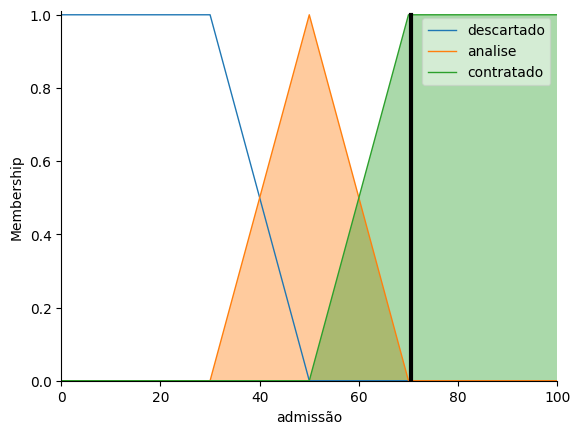

In [35]:
admissao.view(sim=simulador_admissao)
plt.show()